In [1]:
import sys
import MeCab
mecab = MeCab.Tagger("-Ochasen")
node = mecab.parse("多くの動物が人間によって滅ぼされた")
print(node)

多く	オオク	多く	名詞-副詞可能		
の	ノ	の	助詞-連体化		
動物	ドウブツ	動物	名詞-一般		
が	ガ	が	助詞-格助詞-一般		
人間	ニンゲン	人間	名詞-一般		
によって	ニヨッテ	によって	助詞-格助詞-連語		
滅ぼさ	ホロボサ	滅ぼす	動詞-自立	五段・サ行	未然形
れ	レ	れる	動詞-接尾	一段	連用形
た	タ	た	助動詞	特殊・タ	基本形
EOS



In [3]:
import sys
import MeCab

necofile = 'neco.txt'
necofile_parse = 'neco.txt.mecab'

def parse_neco(basetext,outtext):
    mecab = MeCab.Tagger('-Ochasen')
    with open(basetext,'r') as readfile:
        with open(outtext,'w') as outfile:
            outfile.write(mecab.parse(readfile.read()))

neco_mecab = parse_neco(necofile,necofile_parse)
print(neco_mecab)

None


In [4]:
def to_dict(tabbed):
    words = tabbed.split('\n')
    sentence = []
    keitaiso = []
    keitaiso_line = []
    keitaiso_result = []
    for lines in words:
        line = lines.split('\t')
        keitaiso_line.append(line)
        if len(line) >=2:
            result = line[3].split('-')
            keitaiso_result.append(result)
            if len(result) >=2:
                gyo = {
                    'surface':line[0],
                    'base':line[2],
                    'pos':result[0],
                    'pos1':result[1]
                }
            else:
                gyo = {
                    'surface':line[0],
                    'base':line[1],
                    'pos':result[0],
                    'pos1':''
                }
            keitaiso.append(gyo)
            if gyo['pos1'] == '句点':
                sentence.append(keitaiso)
                keitaiso = []
    print(keitaiso_line[:100])
    return sentence

with open('neco.txt.mecab','r') as necome:
    neco_dict = to_dict(necome.read())
    print(neco_dict[:100])

[['一', 'イチ', '一', '名詞-数', '', ''], ['\u3000', '\u3000', '\u3000', '記号-空白', '', ''], ['吾輩', 'ワガハイ', '吾輩', '名詞-代名詞-一般', '', ''], ['は', 'ハ', 'は', '助詞-係助詞', '', ''], ['猫', 'ネコ', '猫', '名詞-一般', '', ''], ['で', 'デ', 'だ', '助動詞', '特殊・ダ', '連用形'], ['ある', 'アル', 'ある', '助動詞', '五段・ラ行アル', '基本形'], ['。', '。', '。', '記号-句点', '', ''], ['名前', 'ナマエ', '名前', '名詞-一般', '', ''], ['は', 'ハ', 'は', '助詞-係助詞', '', ''], ['まだ', 'マダ', 'まだ', '副詞-助詞類接続', '', ''], ['無い', 'ナイ', '無い', '形容詞-自立', '形容詞・アウオ段', '基本形'], ['。', '。', '。', '記号-句点', '', ''], ['\u3000', '\u3000', '\u3000', '記号-空白', '', ''], ['どこ', 'ドコ', 'どこ', '名詞-代名詞-一般', '', ''], ['で', 'デ', 'で', '助詞-格助詞-一般', '', ''], ['生れ', 'ウマレ', '生れる', '動詞-自立', '一段', '連用形'], ['た', 'タ', 'た', '助動詞', '特殊・タ', '基本形'], ['か', 'カ', 'か', '助詞-副助詞／並立助詞／終助詞', '', ''], ['とんと', 'トント', 'とんと', '副詞-一般', '', ''], ['見当', 'ケントウ', '見当', '名詞-サ変接続', '', ''], ['が', 'ガ', 'が', '助詞-格助詞-一般', '', ''], ['つか', 'ツカ', 'つく', '動詞-自立', '五段・カ行イ音便', '未然形'], ['ぬ', 'ヌ', 'ぬ', '助動詞', '特殊・ヌ', '基本形'], ['。', '。', '。', '記号-句点', '',

In [5]:
verb = []
for i in neco_dict:
    for k in i:
        if k['pos'] == '動詞':
            verb.append(k['surface'])
print(verb)

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ', 'し'

In [6]:
verb_base = []
for i in neco_dict:
    for k in i:
        if k['pos'] == '動詞':
            verb_base.append(k['base'])
print(verb_base)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '繰り返す',

In [7]:
sahen = []
for i in neco_dict:
    for k in i:
        if k['base'] != '——':   
            if k['pos'] == '名詞' and k['pos1'] == 'サ変接続':
                sahen.append(k['surface'])
print(sahen)

['見当', '記憶', '話', '装飾', '突起', '運転', '記憶', '分別', '決心', '我慢', '餓死', '訪問', '始末', '猶予', '遭遇', '我慢', '記憶', '返報', '勉強', '勉強', '昼寝', '珍重', '昼寝', '経験', '供', '供', '供', '供', '同居', '観察', '断言', '同衾', '供', '迫害', '尊敬', '生活', '剿滅', '議論', '所有', '憤慨', '観念', '御馳走', '掠奪', '代言', '我儘', '我儘', '失敗', '話', '投書', '関', '決心', '昼寝', '鑑定', '話', '述懐', '想像', '写生', '感心', '昼寝', '失笑', '揶揄', '写生', '欠伸', '自白', '彩色', '写生', '判然', '心中', '感服', '小便', '猶予', '失敬', '欠伸', '予定', '失望', '漫罵', '小便', '増長', '増長', '我儘', '我慢', '報道', '供', '昼寝', '退屈', '加減', '一睡', '運動', '嘆賞', '佇立', '記憶', '珍重', '身動き', '挨拶', '鼓動', '軽蔑', '察', '肥満', '御馳走', '乱暴', '教育', '交際', '同盟', '敬遠', '軽侮', '問答', '御馳走', '邂逅', '邂逅', '相当', '雑談', '自慢', '質問', '発達', '比較', '覚悟', '自慢', '感心', '謹聴', '呼吸', '弁護', '思案', '吶喊', '掃除', '感心', '喝采', '質問', '反対', '呈出', '大息', '加減', '決心', '御馳走', '御馳走', '要心', '放蕩', '放蕩', '放蕩', '放蕩', '放蕩', '放蕩', '自任', '放蕩', '卒業', '関', '料理', '首肯', '批評', '関', '訪問', '忠告', '写生', '写生', '変化', '写生', '主張', '発達', '感心', '感服', '捏造', '話', '喜悦', '対話', '想像', '加減', '顧慮', '挑撥', '忠告',

In [8]:
phrase = []
for i in neco_dict:
    for k in range(len(i)):
        if i[k]['surface'] == 'の' and i[k-1]['pos'] == '名詞' and i[k+1]['pos'] == '名詞':
            phrase.append(i[k-1]['surface'] + i[k]['surface'] + i [k+1]['surface'])
print(phrase)

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上', 

In [9]:
nouns = []
for i in neco_dict:
    for k in range(len(i)):
        if i[k]['pos'] == '名詞' and i[k+1]['pos'] == '名詞':
            nouns.append(i[k]['surface'] + i[k+1]['surface'])
print(nouns)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五', '五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三', '三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱', '胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総', '総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日', '日目', '四疋', '白君', '我等', '等猫', '猫族', '家族的', '的生活', '三毛', '毛君', '所有権', '我々同族', '同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛', '毛君', 'いくら人間', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日', '毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一', '一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', 'ただ一', '一種', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎', '野郎呼', '呼わり', '平生吾輩', '馬鹿野郎', '元来人間', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな', 'かな日', '二時', '時頃', '昼飯後', '運動かたがた', '一本', '本一', '一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずる', 'ずるよう', '猫中', '杉垣', '二三', '三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付',

In [22]:
count_dic = {}
for i in neco_dict:
    for k in i:
        if k['surface'] not in count_dic:
            count_dic.update({k['surface']:1})
        if k['surface'] in count_dic:
            count_dic[k['surface']] += 1
count_dic = [(k, v) for k, v in sorted(count_dic.items(), key=lambda x: x[1], reverse=True)]
print(list(count_dic))



[('の', 9195), ('。', 7487), ('て', 6874), ('、', 6773), ('は', 6423), ('に', 6269), ('を', 6072), ('と', 5516), ('が', 5340), ('た', 3990), ('で', 3814), ('「', 3232), ('」', 3226), ('も', 2480), ('ない', 2392), ('だ', 2368), ('し', 2329), ('から', 2044), ('ある', 1731), ('な', 1613), ('ん', 1569), ('か', 1532), ('いる', 1252), ('事', 1208), ('へ', 1035), ('する', 999), ('う', 993), ('もの', 982), ('君', 974), ('です', 974), ('云う', 938), ('主人', 933), ('よう', 698), ('ね', 684), ('この', 650), ('御', 637), ('ば', 618), ('人', 603), ('その', 577), ('一', 555), ('そう', 555), ('何', 540), ('なる', 532), ('さ', 514), ('よ', 510), ('なら', 484), ('吾輩', 482), ('い', 478), ('ます', 459), ('じゃ', 449), ('…', 434), ('これ', 415), ('\u3000', 412), ('なっ', 405), ('それ', 396), ('来', 365), ('れ', 357), ('見', 351), ('でも', 346), ('時', 345), ('迷亭', 344), ('ませ', 331), ('いい', 321), ('——', 320), ('ところ', 316), ('まで', 314), ('方', 313), ('三', 312), ('二', 303), ('ず', 300), ('上', 295), ('まし', 290), ('寒月', 287), ('顔', 283), ('ぬ', 278), ('先生', 275), ('見る', 274), ('人間', 273),

<class 'list'>
[('の', 9195), ('。', 7487), ('て', 6874), ('、', 6773), ('は', 6423), ('に', 6269), ('を', 6072), ('と', 5516), ('が', 5340), ('た', 3990)]
['の', '。', 'て', '、', 'は', 'に', 'を', 'と', 'が', 'た']
[9195, 7487, 6874, 6773, 6423, 6269, 6072, 5516, 5340, 3990]


<Container object of 10 artists>

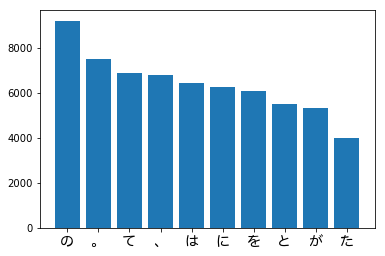

In [37]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
%matplotlib inline
ten = count_dic[:10]
print(type(ten))
print(ten)
words = []
occur = []
for i in ten:
    words.append(i[0])
    occur.append(i[1])
print(words)
print(occur)
fp = FontProperties(fname=r'/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc', size=14)

plt.xticks(range(len(words)),words,fontproperties=fp)
plt.bar(range(len(words)),occur,align='center')


(array([    0.,  6201.,  2267.,  1116.,   686.,   537.,   348.,   276.,
          241.,   172.,   127.,   117.,   111.,   102.,    91.,    79.,
           59.,    53.,    60.,    48.]),
 array([  1.  ,   1.95,   2.9 ,   3.85,   4.8 ,   5.75,   6.7 ,   7.65,
          8.6 ,   9.55,  10.5 ,  11.45,  12.4 ,  13.35,  14.3 ,  15.25,
         16.2 ,  17.15,  18.1 ,  19.05,  20.  ]),
 <a list of 20 Patch objects>)

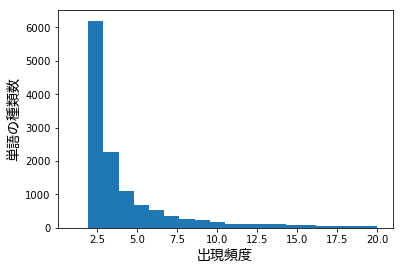

In [44]:
plt.xlabel('出現頻度', fontproperties=fp)
plt.ylabel('単語の種類数', fontproperties=fp)
freq = []
for i in count_dic:
    freq.append(i[1])
plt.hist(freq,bins = 20,range = (1,20))

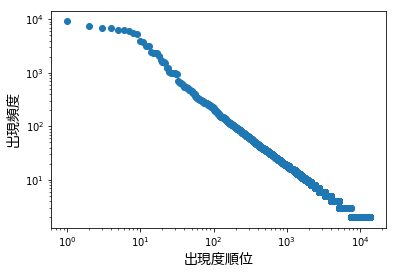

In [48]:
plt.xlabel('出現度順位', fontproperties=fp)
plt.ylabel('出現頻度', fontproperties=fp)
rank = list(range(1,len(count_dic) + 1))
plt.xscale('log')
plt.yscale('log')
plt.scatter(rank,freq)